In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simulated-dataset-jee-dropout-after-class-12/JEE_Dropout_After_Class_12.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/simulated-dataset-jee-dropout-after-class-12/JEE_Dropout_After_Class_12.csv')

In [4]:
data.head()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0


In [5]:
data.shape

(5000, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   jee_main_score        5000 non-null   float64
 1   jee_advanced_score    5000 non-null   float64
 2   mock_test_score_avg   5000 non-null   float64
 3   school_board          5000 non-null   object 
 4   class_12_percent      5000 non-null   float64
 5   attempt_count         5000 non-null   int64  
 6   coaching_institute    3791 non-null   object 
 7   daily_study_hours     5000 non-null   float64
 8   family_income         5000 non-null   object 
 9   parent_education      5000 non-null   object 
 10  location_type         5000 non-null   object 
 11  peer_pressure_level   5000 non-null   object 
 12  mental_health_issues  5000 non-null   object 
 13  admission_taken       5000 non-null   object 
 14  dropout               5000 non-null   int64  
dtypes: float64(5), int64(

In [7]:
data['coaching_institute'].shape

(5000,)

In [8]:
data['coaching_institute'].tail()

4995    FIITJEE
4996      Local
4997        NaN
4998      Allen
4999    FIITJEE
Name: coaching_institute, dtype: object

In [9]:
data['coaching_institute'].value_counts()

coaching_institute
FIITJEE    1298
Local      1265
Allen      1228
Name: count, dtype: int64

In [10]:
print(data['coaching_institute'].isna().sum())

1209


In [11]:
data['coaching_institute'].dropna(axis=0,inplace=True)

In [12]:
data['coaching_institute'] = data['coaching_institute'].fillna('Unknown')

In [13]:
data['coaching_institute'].value_counts()

coaching_institute
FIITJEE    1298
Local      1265
Allen      1228
Unknown    1209
Name: count, dtype: int64

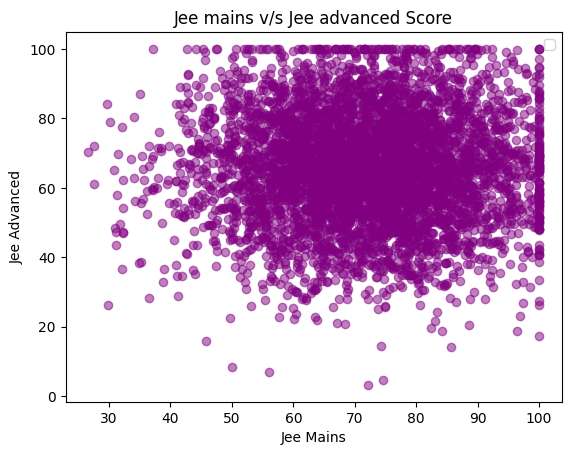

In [14]:
# Correlation between the two exams
plt.scatter(data['jee_main_score'],data['jee_advanced_score'],color='purple',alpha=0.5)
plt.title("Jee mains v/s Jee advanced Score")
plt.xlabel("Jee Mains")
plt.ylabel("Jee Advanced")
plt.legend()
plt.show()

In [15]:
print(data['jee_main_score'].corr(data['jee_advanced_score']))

0.00020583797667848765


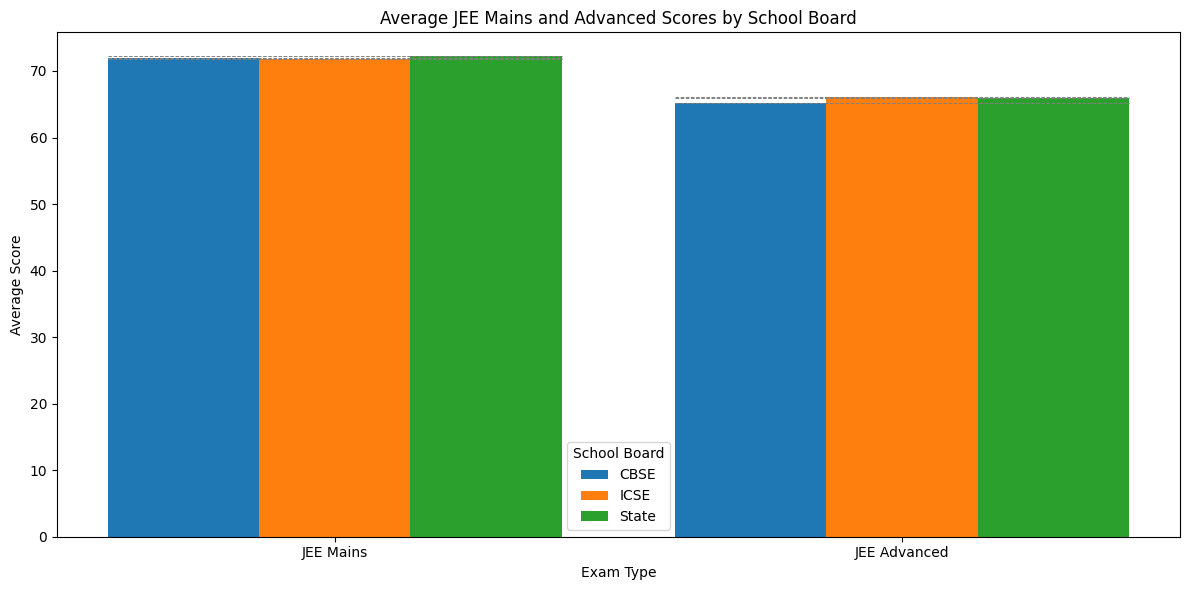

In [16]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['jee_main_score', 'jee_advanced_score']
grouped = data.groupby('school_board')[categories].mean()
schoolBoards = grouped.index.tolist()

x = np.arange(len(categories))  # 0, 1 for two exams
width = 0.8 / len(schoolBoards)

fig, ax = plt.subplots(figsize=(12, 6))

for i, sb in enumerate(schoolBoards):
    offset = (i - len(schoolBoards)/2) * width + width/2
    scores = grouped.loc[sb].values

    # Plot the bars
    ax.bar(x + offset, scores, width, label=sb)

    # Add horizontal lines at the height of each bar
    for j, score in enumerate(scores):
        ax.hlines(y=score, xmin=x[j] - 0.4, xmax=x[j] + 0.4, linestyles='dashed', colors='gray', linewidth=0.7)

# Labeling
ax.set_title("Average JEE Mains and Advanced Scores by School Board")
ax.set_xlabel("Exam Type")
ax.set_ylabel("Average Score")
ax.set_xticks(x)
ax.set_xticklabels(['JEE Mains', 'JEE Advanced'])
ax.legend(title="School Board")

plt.tight_layout()
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [18]:
columns_for_le =['school_board','coaching_institute','family_income','parent_education','location_type','peer_pressure_level','mental_health_issues','admission_taken']

for column in columns_for_le:
    new_col = column + '_encoded'
    data[new_col] = le.fit_transform(data[column])
    print(column,"-",le.classes_ )
    print(data[[new_col,column]].head())
    print("******************************************************")
    data[column] = data[new_col]
    data.drop(columns=new_col, inplace=True)

school_board - ['CBSE' 'ICSE' 'State']
   school_board_encoded school_board
0                     0         CBSE
1                     2        State
2                     1         ICSE
3                     1         ICSE
4                     0         CBSE
******************************************************
coaching_institute - ['Allen' 'FIITJEE' 'Local' 'Unknown']
   coaching_institute_encoded coaching_institute
0                           1            FIITJEE
1                           1            FIITJEE
2                           1            FIITJEE
3                           1            FIITJEE
4                           0              Allen
******************************************************
family_income - ['High' 'Low' 'Mid']
   family_income_encoded family_income
0                      1           Low
1                      2           Mid
2                      1           Low
3                      1           Low
4                      2           Mid
*****

In [19]:
data.head()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,0,70.09,1,1,5.4,1,3,2,1,0,0,1
1,70.06,58.75,64.33,2,78.00,1,1,5.5,2,3,2,1,1,0,0
2,81.07,37.27,60.83,1,64.36,1,1,7.0,1,2,1,2,1,0,1
3,93.32,60.72,69.33,1,73.21,1,1,2.1,1,0,1,2,1,1,0
4,68.72,77.73,82.37,0,89.02,1,0,6.3,2,1,1,0,0,1,0


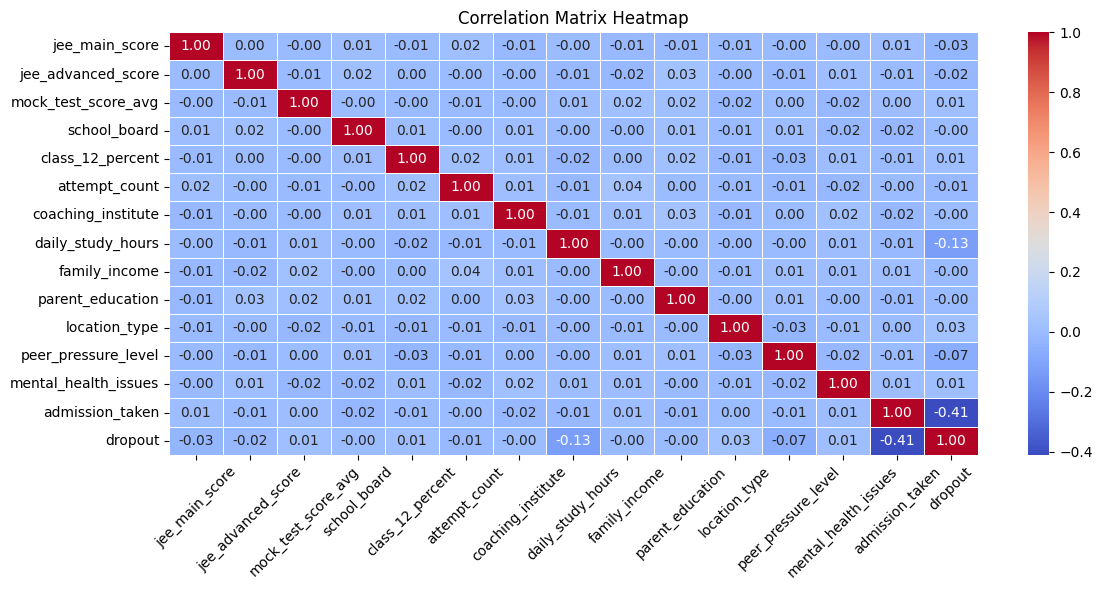

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [21]:
data.head()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,0,70.09,1,1,5.4,1,3,2,1,0,0,1
1,70.06,58.75,64.33,2,78.00,1,1,5.5,2,3,2,1,1,0,0
2,81.07,37.27,60.83,1,64.36,1,1,7.0,1,2,1,2,1,0,1
3,93.32,60.72,69.33,1,73.21,1,1,2.1,1,0,1,2,1,1,0
4,68.72,77.73,82.37,0,89.02,1,0,6.3,2,1,1,0,0,1,0


In [22]:
feature = data.drop(columns='dropout', axis=1)
target = data['dropout']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature, target, test_size=0.2, random_state=0)
print(feature.shape,x_train.shape,x_test.shape)

(5000, 14) (4000, 14) (1000, 14)


In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

x_train = x_train_scaled
x_test = x_test_scaled

In [25]:
print(x_train)

[[ 7.70725490e-01  5.55260671e-01  2.67718044e+00 ... -9.18157435e-04
   1.02994825e+00 -9.96007968e-01]
 [ 1.38213657e+00  3.90122531e-01 -1.47573887e+00 ... -1.22512807e+00
   1.02994825e+00 -9.96007968e-01]
 [-1.60990619e+00 -1.29893297e+00  2.04103114e-01 ... -9.18157435e-04
   1.02994825e+00  1.00400803e+00]
 ...
 [-3.65169652e-01  3.49308922e-01  1.67953768e+00 ...  1.22329176e+00
  -9.70922565e-01  1.00400803e+00]
 [-2.26003267e+00 -6.30217689e-01  7.87883952e-01 ...  1.22329176e+00
  -9.70922565e-01 -9.96007968e-01]
 [ 5.71304671e-01 -3.96010365e-01 -1.48583306e+00 ...  1.22329176e+00
  -9.70922565e-01 -9.96007968e-01]]


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'KNN Classifier': KNeighborsClassifier(),
    'Gradient Boost Classifier': GradientBoostingClassifier(),
    'SVC' : SVC()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred = model.predict(x_train)

    AccuracyScore  = accuracy_score(y_train, pred)
    PrecisionScore = precision_score(y_train, pred, average='binary')
    RecallScore    = recall_score(y_train, pred, average='binary')
    F1Score        = f1_score(y_train, pred, average='binary')
    
    print(f"On Training Data: {name} — Accuracy: {AccuracyScore:.3f}, Precision: {PrecisionScore:.3f}, "
          f"Recall: {RecallScore:.3f}, F1: {F1Score:.3f}")

    pred_test = model.predict(x_test)

    AccuracyScore  = accuracy_score(y_test, pred_test)
    PrecisionScore = precision_score(y_test, pred_test, average='binary')
    RecallScore    = recall_score(y_test, pred_test, average='binary')
    F1Score        = f1_score(y_test, pred_test, average='binary')

    print(f"On Testing Data: {name} — Accuracy: {AccuracyScore:.3f}, Precision: {PrecisionScore:.3f}, "
          f"Recall: {RecallScore:.3f}, F1: {F1Score:.3f}")

    print("---------------------------------------------------------------------------------------")

On Training Data: Logistic Regression — Accuracy: 0.799, Precision: 0.542, Recall: 0.178, F1: 0.268
On Testing Data: Logistic Regression — Accuracy: 0.800, Precision: 0.568, Recall: 0.200, F1: 0.296
---------------------------------------------------------------------------------------
On Training Data: Random Forest Classifier — Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1: 1.000
On Testing Data: Random Forest Classifier — Accuracy: 0.997, Precision: 1.000, Recall: 0.986, F1: 0.993
---------------------------------------------------------------------------------------
On Training Data: KNN Classifier — Accuracy: 0.936, Precision: 0.898, Recall: 0.781, F1: 0.835
On Testing Data: KNN Classifier — Accuracy: 0.874, Precision: 0.744, Recall: 0.610, F1: 0.670
---------------------------------------------------------------------------------------
On Training Data: Gradient Boost Classifier — Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1: 1.000
On Testing Data: Gradient Boost C